# Improvements on SVM 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
data = pd.read_csv("./data/cleveland_final.csv")
column_list = data.columns
for i in column_list:
    print("Values of",i,"column\n",data[i].unique())
    print("--------------\n")
    
data.describe()

Values of age column
 [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]
--------------

Values of sex column
 [1 0]
--------------

Values of cp column
 [1 4 3 2]
--------------

Values of trestbps column
 [145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154]
--------------

Values of htn column
 [1 0]
--------------

Values of chol column
 [233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 

,age,sex,cp,trestbps,htn,chol,cigs,years,fbs,dm,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,...,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.00000
mean,54.411348,0.677305,3.163121,131.563830,0.617021,249.092199,16.460993,14.829787,0.148936,-8.184397,...,1.042553,1.141844,1.205674,1.156028,1.163121,1.173759,1.127660,1.134752,1.411348,1.14539
std,9.053083,0.468338,0.955405,17.757496,0.486977,51.217546,19.580300,15.564563,0.356658,2.741802,...,0.202206,0.349510,0.404912,0.363527,0.370132,0.379576,0.334304,0.766002,1.439508,0.44257
min,29.000000,0.000000,1.000000,94.000000,0.000000,126.000000,-9.000000,-9.000000,0.000000,-9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,213.000000,0.000000,0.000000,0.000000,-9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
50%,55.000000,1.000000,3.000000,130.000000,1.000000,244.000000,10.000000,15.000000,0.000000,-9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
75%,61.000000,1.000000,4.000000,140.000000,1.000000,277.000000,30.000000,30.000000,0.000000,-9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,77.000000,1.000000,4.000000,200.000000,1.000000,564.000000,99.000000,54.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,8.000000,4.00000


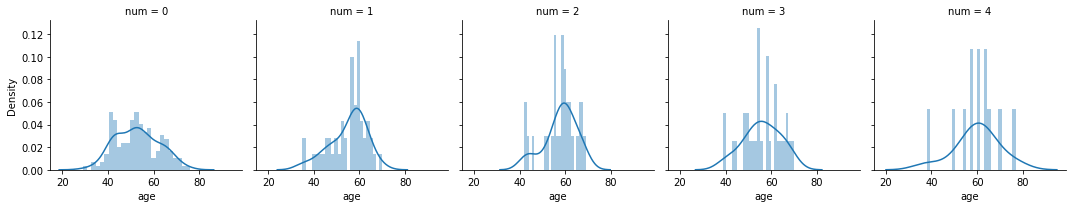

In [3]:
g = sns.FacetGrid(data, col = "num")
g.map(sns.distplot, "age", bins = 25)
plt.show()

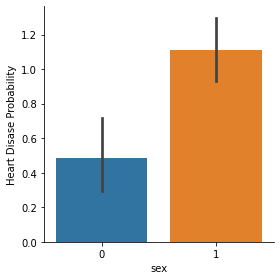

In [4]:
column_list2 = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]

g = sns.factorplot(x = column_list2[0], y = "num", data = data, kind = "bar",size=4)
g.set_ylabels("Heart Disase Probability")
g.set_xlabels(column_list2[0])
plt.show()

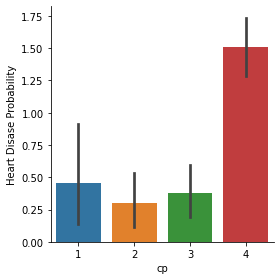

In [5]:
g = sns.factorplot(x = column_list2[1], y = "num", data = data, kind = "bar",size=4)
g.set_ylabels("Heart Disase Probability")
g.set_xlabels(column_list2[1])
plt.show()

In [6]:
dummy_list = ["sex","cp","restecg","exang","slope","thal"]
data = pd.get_dummies(data,columns=dummy_list)
data.head()

,age,trestbps,htn,chol,cigs,years,fbs,dm,famhist,ekgmo,...,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_-9,thal_3,thal_6,thal_7
0,63,145,1,233,50,20,1,-9,1,2,...,1,1,0,0,0,1,0,0,1,0
1,67,160,1,286,40,40,0,-9,1,3,...,1,0,1,0,1,0,0,1,0,0
2,67,120,1,229,20,35,0,-9,1,2,...,1,0,1,0,1,0,0,0,0,1
3,37,130,0,250,0,0,0,-9,1,2,...,0,1,0,0,0,1,0,1,0,0
4,41,130,1,204,0,0,0,-9,1,2,...,1,1,0,1,0,0,0,1,0,0


In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
y = data.num.values
x = data.drop(["num"],axis=1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print("x_train",len(x_train))
print("x_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

x_train 197
x_test 85
y_train 197
y_test 85


In [10]:
random_state = 42
classifier = [KNeighborsClassifier(),
              SVC(random_state = random_state,probability=True),
              DecisionTreeClassifier(random_state = random_state),
              RandomForestClassifier(random_state = random_state),
              LogisticRegression(random_state = random_state),
             ]

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

svm_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

classifier_param = [knn_param_grid,
                   svm_param_grid,
                   dt_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [11]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_ * 100)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 40 candidates, totalling 400 fits
58.94736842105264
Fitting 10 folds for each of 28 candidates, totalling 280 fits
55.86842105263159
Fitting 10 folds for each of 250 candidates, totalling 2500 fits
82.18421052631581
Fitting 10 folds for each of 54 candidates, totalling 540 fits
77.07894736842104
Fitting 10 folds for each of 14 candidates, totalling 140 fits
55.868421052631575


Text(0.5, 1.0, 'Cross Validation Scores')

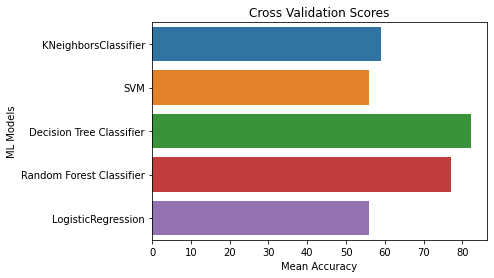

In [12]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "KNeighborsClassifier", "SVM","Decision Tree Classifier",
             "Random Forest Classifier","LogisticRegression",
            ]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

In [13]:
best_estimators

[KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance'),
 SVC(C=1, gamma=0.001, probability=True, random_state=42),
 DecisionTreeClassifier(max_depth=7, min_samples_split=30, random_state=42),
 RandomForestClassifier(bootstrap=False, max_features=10, min_samples_split=3,
                        random_state=42),
 LogisticRegression(C=0.001, random_state=42)]

In [14]:
knn9 = KNeighborsClassifier(n_neighbors = 9)
knn9.fit(x_train, y_train)
y_head_knn = knn9.predict(x_test)

svm = SVC(C=1, gamma=0.001, probability=True, random_state=42)
svm.fit(x_train,y_train)
y_head_svm = svm.predict(x_test)

rf = RandomForestClassifier(max_depth=7, min_samples_split=30, random_state=42)
rf.fit(x_train,y_train)
y_head_rf = rf.predict(x_test)

dt = DecisionTreeClassifier(max_depth=7, min_samples_split=30, random_state=42)
dt.fit(x_train,y_train)
y_head_dt = dt.predict(x_test)

lr = LogisticRegression(C=0.001, random_state=42)
lr.fit(x_train,y_train)
y_head_lr = lr.predict(x_test)

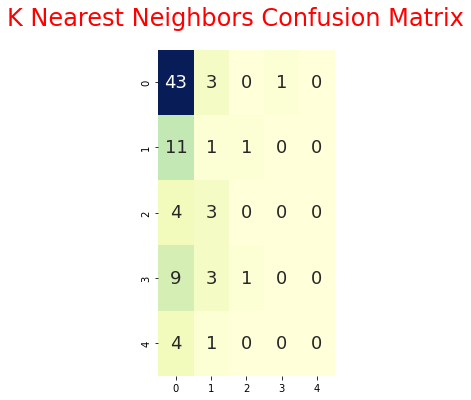

              precision    recall  f1-score   support

           0       0.61      0.91      0.73        47
           1       0.09      0.08      0.08        13
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         5

    accuracy                           0.52        85
   macro avg       0.14      0.20      0.16        85
weighted avg       0.35      0.52      0.42        85



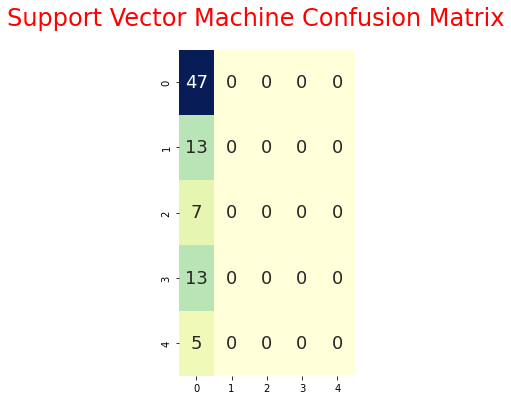

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        47
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         5

    accuracy                           0.55        85
   macro avg       0.11      0.20      0.14        85
weighted avg       0.31      0.55      0.39        85



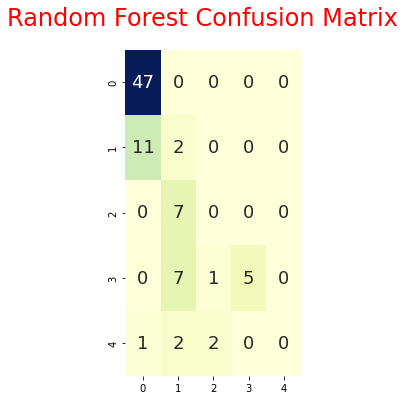

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        47
           1       0.11      0.15      0.13        13
           2       0.00      0.00      0.00         7
           3       1.00      0.38      0.56        13
           4       0.00      0.00      0.00         5

    accuracy                           0.64        85
   macro avg       0.38      0.31      0.31        85
weighted avg       0.61      0.64      0.60        85



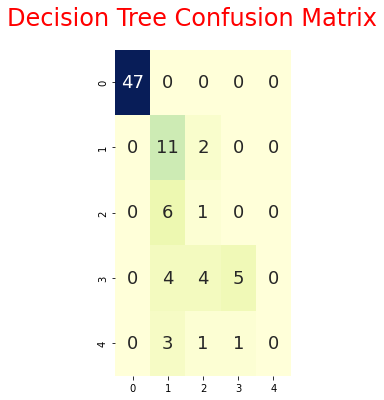

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.46      0.85      0.59        13
           2       0.12      0.14      0.13         7
           3       0.83      0.38      0.53        13
           4       0.00      0.00      0.00         5

    accuracy                           0.75        85
   macro avg       0.48      0.47      0.45        85
weighted avg       0.76      0.75      0.74        85



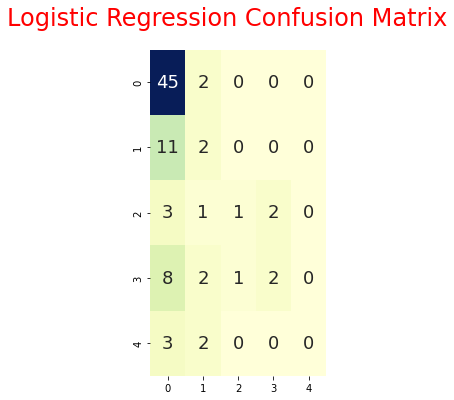

              precision    recall  f1-score   support

           0       0.64      0.96      0.77        47
           1       0.22      0.15      0.18        13
           2       0.50      0.14      0.22         7
           3       0.50      0.15      0.24        13
           4       0.00      0.00      0.00         5

    accuracy                           0.59        85
   macro avg       0.37      0.28      0.28        85
weighted avg       0.51      0.59      0.51        85



In [15]:
# We find confusion matrix of models below.
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_dt = confusion_matrix(y_test,y_head_dt)
cm_lr = confusion_matrix(y_test,y_head_lr)

plt.figure(figsize=(12,6))
plt.suptitle("K Nearest Neighbors Confusion Matrix",fontsize=24, color="red")
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
plt.subplot(1,3,2)
sns.heatmap(cm_knn,annot=True, cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 18})
plt.show()
print(classification_report(y_test,y_head_knn))


plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
plt.subplot(1,3,2)
plt.suptitle("Support Vector Machine Confusion Matrix",fontsize=24, color="red")
sns.heatmap(cm_svm,annot=True, cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 18})
plt.show()
print(classification_report(y_test,y_head_svm))

plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
plt.subplot(1,3,2)
plt.suptitle("Random Forest Confusion Matrix",fontsize=24, color="red")
sns.heatmap(cm_rf,annot=True, cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 18})
plt.show()
print(classification_report(y_test,y_head_rf))


plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
plt.subplot(1,3,2)
plt.suptitle("Decision Tree Confusion Matrix",fontsize=24, color="red")
sns.heatmap(cm_dt,annot=True, cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 18})
plt.show()
print(classification_report(y_test,y_head_dt))

plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
plt.subplot(1,3,2)
plt.suptitle("Logistic Regression Confusion Matrix",fontsize=24, color="red")
sns.heatmap(cm_lr,annot=True, cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 18})
plt.show()
print(classification_report(y_test,y_head_lr))


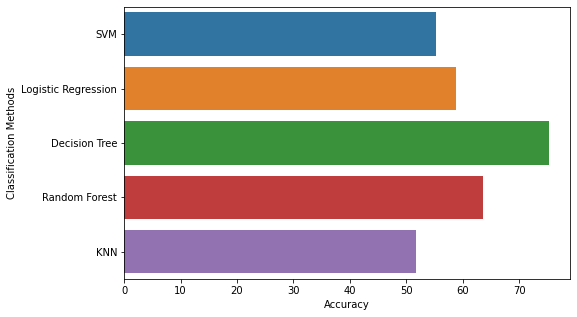

In [16]:
best_accuracies = {}
best_accuracies["SVM"] = accuracy_score(y_test,y_head_svm)*100
best_accuracies["Logistic Regression"] = accuracy_score(y_test,y_head_lr)*100
best_accuracies["Decision Tree"] = accuracy_score(y_test,y_head_dt)*100
best_accuracies["Random Forest"] = accuracy_score(y_test,y_head_rf)*100
best_accuracies["KNN"] = accuracy_score(y_test,y_head_knn)*100

plt.figure(figsize=(8,5))
sns.barplot( y=list(best_accuracies.keys()), x=list(best_accuracies.values()))
plt.xlabel("Accuracy")
plt.ylabel("Classification Methods")
plt.show()

In [17]:
bt_df = pd.read_csv("./data/cleveland_final.csv")

x1 = bt_df[bt_df.columns.drop('num')]
y1 = bt_df['num']

xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1, train_size=0.6, test_size=0.4)
xtrain1, xcv1, ytrain1, ycv1 = train_test_split(xtrain1, ytrain1, train_size=0.75, test_size=0.25)


              precision    recall  f1-score   support

           0       0.73      0.90      0.81        21
           1       0.00      0.00      0.00         9
           2       0.40      0.40      0.40         5
           3       0.40      0.33      0.36         6
           4       0.33      0.50      0.40         2

    accuracy                           0.56        43
   macro avg       0.37      0.43      0.39        43
weighted avg       0.47      0.56      0.51        43



array([0.46153846, 0.48      , 0.68      , 0.56      , 0.48      ])

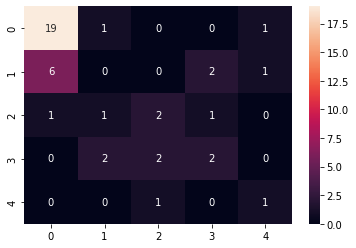

In [18]:
# Linear kernel
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns


LsvmClassifier = SVC(kernel='linear', random_state=0)
LsvmClassifier.fit(xtrain1, ytrain1)
yprediction = LsvmClassifier.predict(xcv1)
cm = confusion_matrix(ycv1, yprediction)
sns.heatmap(cm, annot=True)
print(classification_report(ycv1, yprediction))
cross_val_score(LsvmClassifier, xtrain1, ytrain1, cv=5)

              precision    recall  f1-score   support

           0       0.49      1.00      0.66        21
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.49        43
   macro avg       0.10      0.20      0.13        43
weighted avg       0.24      0.49      0.32        43



array([0.53846154, 0.52      , 0.52      , 0.52      , 0.56      ])

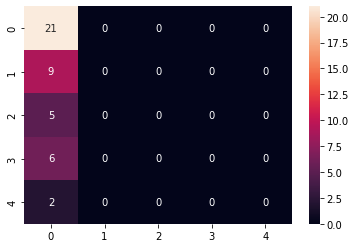

In [19]:
# Polynomial kernel

PsvmClassifier = SVC(kernel='poly', random_state=0)
PsvmClassifier.fit(xtrain1, ytrain1)
yprediction = PsvmClassifier.predict(xcv1)
cm = confusion_matrix(ycv1, yprediction)
sns.heatmap(cm, annot=True)
print(classification_report(ycv1, yprediction))
cross_val_score(PsvmClassifier, xtrain1, ytrain1, cv=5)

              precision    recall  f1-score   support

           0       0.49      1.00      0.66        21
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.49        43
   macro avg       0.10      0.20      0.13        43
weighted avg       0.24      0.49      0.32        43



array([0.53846154, 0.52      , 0.52      , 0.52      , 0.56      ])

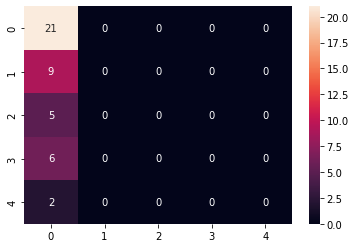

In [20]:
# RBF kernel

RsvmClassifier = SVC(kernel='rbf', random_state=0)
RsvmClassifier.fit(xtrain1, ytrain1)
yprediction = RsvmClassifier.predict(xcv1)
cm = confusion_matrix(ycv1, yprediction)
sns.heatmap(cm, annot=True)
print(classification_report(ycv1, yprediction))
cross_val_score(RsvmClassifier, xtrain1, ytrain1, cv=5)

In [21]:
param_grid = [{'kernel': ['linear'], 'C': [100, 10, 1.0, 0.1, 0.01, 0.001]}, 
              {'kernel': ['poly'], 'gamma': [0.01, 0.001, 0.0001], 'C': [100, 10, 1.0, 0.1, 0.01, 0.001]}, 
              {'kernel': ['rbf'], 'gamma': [0.01, 0.001, 0.0001], 'C': [100, 10, 1.0, 0.1, 0.01, 0.001]},
              {'kernel': ['sigmoid'], 'gamma': [0.01, 0.001, 0.0001]}
             ]

# import sklearn 
# print(sorted(sklearn.metrics.SCORERS.keys())) 
scores = ['f1', 'precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    
    clf = GridSearchCV(SVC(), param_grid, scoring='%s_macro' % score)

    clf.fit(xtrain1, ytrain1)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']          
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#          print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = ytest1, clf.predict(xtest1)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for f1
Best parameters set found on development set:

{'C': 100, 'kernel': 'linear'}

Grid scores on development set:


Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        69
           1       0.35      0.23      0.28        26
           2       0.20      0.20      0.20        10
           3       0.33      0.50      0.40         6
           4       0.00      0.00      0.00         2

    accuracy                           0.63       113
   macro avg       0.34      0.36      0.35       113
weighted avg       0.63      0.63      0.62       113


# Tuning hyper-parameters for precision
Best parameters set found on development set:

{'C': 100, 'kernel': 'linear'}

Grid scores on development set:


Detailed classification report:

The model is trained on the full developme

In [22]:
# Best model params: C:0.01 kerbnel: linear
# Using validation to find the most wrong predictions. 
clf = SVC(kernel= 'linear', C=0.01)
clf.fit(xtrain1, ytrain1)
y_true, y_pred = ytest1, clf.predict(xtest1)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        69
           1       0.50      0.04      0.07        26
           2       0.29      0.20      0.24        10
           3       0.33      0.50      0.40         6
           4       0.00      0.00      0.00         2

    accuracy                           0.63       113
   macro avg       0.37      0.34      0.30       113
weighted avg       0.59      0.63      0.55       113



## 63% large dataset Best accuracy in SVM

<AxesSubplot:title={'center':'SVM Confusion Matrix'}>

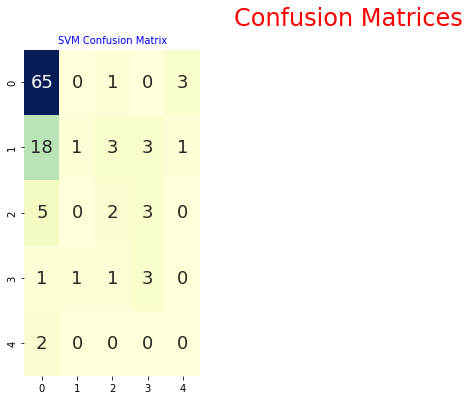

In [23]:
cm_svm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,6))
plt.suptitle("Confusion Matrices",fontsize=24, color="red")
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,3,1)
plt.title("SVM Confusion Matrix",fontsize=10,color="blue")
sns.heatmap(cm_svm,annot=True, cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 18})

In [24]:
'''
initialise another column/variable called uncertainity

assign random values from [-1, 0, 1]

wrong predictions: 
  4: "2" - 3/0     - 1st   10
  3: "1" - 6/6     - 3rd    6
  2: "1" - 5/2     - 2nd    8
  1: "1" - 4/53, "2" - 4/53   - 4th  4
'''
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from mlxtend.classifier import StackingCVClassifier

heart_df = pd.read_csv('./data/cleveland_short.csv')
y = heart_df["num"]
x = heart_df.drop('num',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state = 0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)

m5 = 'K-NeighborsClassifier'
knn = DecisionTreeClassifier()

m7 = 'Support Vector Classifier'
svc =  SVC(kernel='linear', C=10)

scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(x_train,y_train)
scv_predicted = scv.predict(x_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

[22:10:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:10:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:10:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[73  0  0  0  0]
 [26  0  0  2  0]
 [16  1  0  0  0]
 [11  0  2  2  0]
 [ 6  2  0  0  0]]


Accuracy of StackingCVClassifier: 53.191489361702125 

              precision    recall  f1-score   support

           0       0

In [26]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectFromModel,RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
    data = pd.read_csv("./data/cleveland_final.csv")
    y = data.num.values
    X = data.drop(["num"],axis=1)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()

    # dtc
    rfe = RFECV(estimator=DecisionTreeClassifier(), cv=StratifiedKFold(5))
    model = DecisionTreeClassifier()
    models['dtc'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rfc
    rfe = RFECV(estimator=RandomForestClassifier(), cv=StratifiedKFold(5))
    model = DecisionTreeClassifier()
    models['rfc'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbc
    rfe = RFECV(estimator=GradientBoostingClassifier(), cv=StratifiedKFold(5))
    model = DecisionTreeClassifier()
    models['gbc'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    rfe = RFECV(estimator=SVC(kernel= 'linear', C=10), cv=StratifiedKFold(5))
    model = DecisionTreeClassifier()
    models['svc'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [27]:
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>dtc 0.951 (0.044)


KeyboardInterrupt: 

In [ ]:
from sklearn import feature_selection
from sklearn import pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


class MyPipe(pipeline.Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(MyPipe, self).fit(X, y, **fit_params)
        self.coef_ = self.steps[-1][-1].coef_
        return self


X, y = get_dataset()

est = SVR(kernel="linear")
selector = feature_selection.RFE(est)
clf = GridSearchCV(selector, param_grid={'estimator__C': [1, 10, 100]})
clf.fit(X, y)
print(clf.grid_scores_)

# With Pipeline
est = MyPipe([('svr', SVR(kernel="linear"))])
selector = feature_selection.RFE(est)
clf = GridSearchCV(selector, param_grid={'estimator__svr__C': [1, 10, 100]})
clf.fit(X, y)
print(clf.grid_scores_)